<a href="https://colab.research.google.com/github/rileythejones/DS-Unit-1-Build/blob/master/Master_RJ_BCOD_Trails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 

df = pd.read_csv('http://gis-bouldercounty.opendata.arcgis.com/datasets/6ecc28f8192a43888b0a4d4924bcd64c_0.csv')
df.columns

# changing to categorical
# df.SURFACE_TYPE = pd.Categorical(df.SURFACE_TYPE)
df['Terrain'] = df['SURFACE_TYPE']
df['Width'] = df['WIDTH']
df['Terrain_Code'] = pd.factorize(df['Terrain'])[0] + 1
LE = LabelEncoder()
df['Terrain_Code'] = LE.fit_transform(df['Terrain_Code'])
print(df['Terrain_Code'].value_counts(), " \n", df['Terrain'].value_counts())
# Cutting into percentiles.

df['Minimum Altitude'] = pd.qcut(df.Z_Min, 120, labels=False)
df['Maximum Altitude'] = pd.qcut(df.Z_Max, 120, labels=False)
df['Average Altitude'] = pd.qcut(df.Z_Mean, 120, labels=False)


df['Width'] = pd.qcut(df.Width, 120, labels=False, duplicates='drop')


df['Length2'] = pd.qcut(df.Shapelen, 120, labels=False)
df['Length'] = pd.qcut(df.SLength, 120, labels=False)

df['Altitude Climb'] = pd.qcut(df.VerticalGain, 120, labels=False)

df['Mean Slope'] = pd.qcut(df.Avg_Slope, 120, labels=False)
df['Minimum Slope'] = pd.qcut(df.Min_Slope, 120, labels=False, duplicates='drop')
df['Maximum Slope'] = pd.qcut(df.Max_Slope, 120, labels=False)

df_new = df[['Average Altitude', 'Maximum Altitude','Minimum Altitude', 'Length', 
             'Altitude Climb', 'Mean Slope', 'Minimum Slope',
             'Maximum Slope']].copy().dropna()


3    151
2    139
1     50
6     19
0      9
5      6
4      4
Name: Terrain_Code, dtype: int64  
 Crusher Fines    151
Natural          139
Concrete          50
Road Base         19
Boardwalk          6
Stairs             4
Name: Terrain, dtype: int64


In [0]:

# , 'SURFACE_TYPE', 'DOG' 'SLength_BIN', 
  # 'SURFACE_TYPE_CODES',   'FEATURE_TYPE'  'Width',    

In [0]:
import matplotlib.cm as cm
def scatterplot(df, x_dim, y_dim, category):
   plt.style.use('_classic_test')
   fig, ax = plt.subplots(figsize=(6, 8))

   x = df[x_dim]
   y = df[y_dim]
   categories = df[category]

   colors = ['#B8B8B8', '#2AFF00', '#EE1313', '#220CF3', '#F48024', '#6D6400']
   

   for i in range(len(df)):
     ax.scatter(x.iloc[i], y.iloc[i], alpha=0.70, color = colors[i%len(colors)], label=(categories.iloc[i]))
   ax.legend(categories.unique(), loc='center left', bbox_to_anchor=(1, 0.5))
   
   ax.set_title('{}'.format(x_dim) + " against " '{}'.format(y_dim))
   ax.set_xlabel('{}'.format(x_dim))
   ax.set_ylabel('{}'.format(y_dim))
   ax.spines['top'].set_visible(True)
   ax.spines['right'].set_visible(True)
   ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

   plt.show()
   
  #  scatterplot(df_new, 'Avg_Slope_BIN', 'SLength_BIN', 'SURFACE_TYPE')
  #  scatterplot(df_new, 'SLength_BIN', 'WIDTH', 'SURFACE_TYPE')
  #  scatterplot(df_new, 'SLength_BIN', 'WIDTH', 'DOG')
  #  scatterplot(df_new, 'SLength_BIN', 'WIDTH', 'DOG')


In [0]:
# x, y = df_new['Avg_Slope_BIN'], df_new['SLength_BIN']
# c = df_new['SURFACE_TYPE_CODES']
# s = df_new['WIDTH']

# fig, ax = plt.subplots()

# scatter = ax.scatter(x, y, c=c, s=s)

# # produce a legend with the unique colors from the scatter
# legend1 = ax.legend(*scatter.legend_elements(),
#                     loc="lower left", title="Classes")
# ax.add_artist(legend1)

# # produce a legend with a cross section of sizes from the scatter
# handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
# legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

# plt.show()

In [0]:
# target = 'FEATURE_TYPE'
# features = df.columns.drop(['FEATURE_TYPE'])
# for feature in features:
#     sns.scatterplot(x=feature, y=target, data=df, alpha=0.1)
#     plt.show()

In [0]:
# 'Shapelen', 'Avg_Slope', 'WIDTH', 'VerticalGain', 'FEATURE_TYPE'

In [0]:
# df['SLength'].apply(f(df['SLength'], 100, 1000))

# def filter(data):
#     if data in df:
#         return "There"
#     elif data == 'Here':
#         return 'Here'
#     else:
#         return "Nowhere"

# def f(x, A, B):
#     if x <= A:
#         x = 'Less than %s'%(A)
#     elif 8000 < x <= 25000:
#         x = 'Between %s and %s'%(A, B,)
#     elif 25000 < x:
#         x = 'Greater than %s'%(B)
#     return x

In [0]:
pip install chart_studio

In [0]:
import chart_studio
chart_studio.tools.set_credentials_file(username='rileythejones', api_key='SkcczIxQWgINUNFKD1vT')

In [0]:
import chart_studio.plotly as py
from plotly.subplots import make_subplots

table = ff.create_table(df_new)
py.iplot(table, filename='Trails')

In [0]:
import time
from subprocess import check_output


# print(check_output(["ls", "../input"]).decode("utf8"))


In [0]:
df_new.shape

(350, 11)

In [0]:
y.shape

(350,)

In [0]:
x.shape

(344, 11)

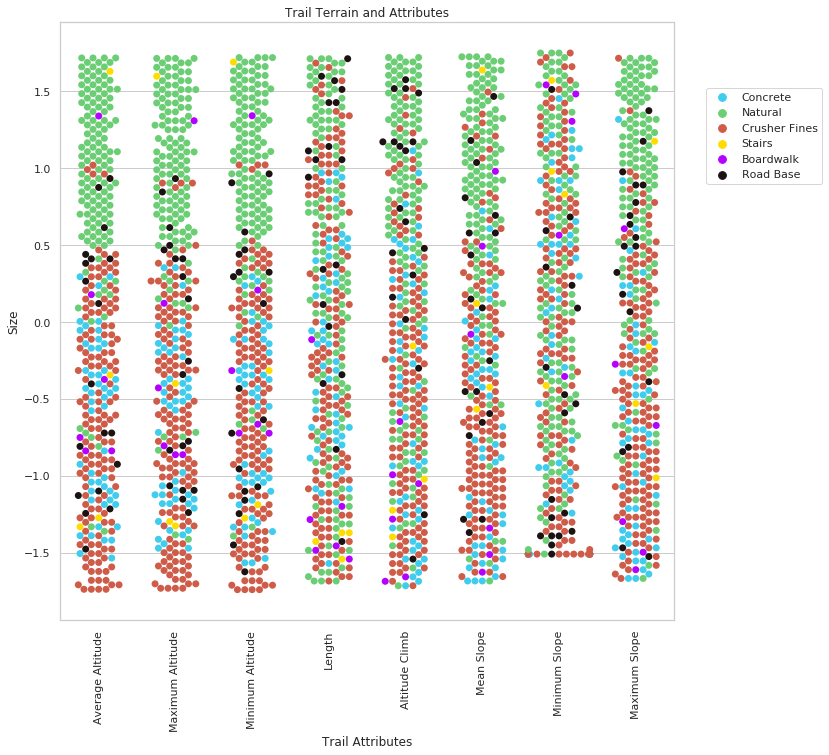

In [0]:
x = df_new
y = df.Terrain
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              
data = pd.concat([y,data_n_2.iloc[:,0:100]],axis=1)
data = pd.melt(data,id_vars="Terrain",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(11, 11))

# we wanted to represent width with variable marker 
# sizes but that's not possible with swarmplot

# Create an array with the colors you want to use
colors = ["#40CDED", "#6BCE75", "#CE5C48", "#FFDC00", "#B600FF", "#1C1212"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))


s = sns.swarmplot(x="features", y="value", hue="Terrain", data=data, size=7)
s.legend(loc='upper right', bbox_to_anchor=(1.25, 0.9), ncol=1)


s.set_title('Trail Terrain and Attributes')
s.set_ylabel('Size')
s.set_xlabel('Trail Attributes')

plt.xticks(rotation=90)
plt.show()

In [0]:
df["Terrain_Code"] = df["Terrain_Code"].dropna()

In [0]:
# x = df_new['Mean Slope']
# y = df_new['Length']
# category = df['Terrain_Code']
# width = df['Width']

# fig, ax = plt.subplots()


# scatter = ax.scatter(x, y, c=category, s=0.3*(width*3)**2,
#                      vmin=-3, vma=3, cmap="Spectral")

# legend1 = ax.legend(*scatter.legend_elements(num=5),
#                     loc="upper left", title="category")
# ax.add_artist(legend1)

# kw = dict(prop="sizes", num=5, color=scatter.cmap(0.7), fmt="$ {x:.2f}",
#           func=lambda s: np.sqrt(s/.3)/3)
# legend2 = ax.legend(*scatter.legend_elements(**kw),
#                     loc="lower right", title="width")

# plt.show()

In [0]:
# We want a scatterplot for Mean Slope and Length where Width scales the markers
# We want some Descriptive bar plots for 
# PED BIKE HORSE DOG 
# OWNER MAINTENANCE ENFORCEMENT
# Barplot for terrain and width 
# We want a map 
# We want to see the wide variation in lengths. 


In [0]:
df['WIDTH'].value_counts()

3.0     102
8.0      77
10.0     46
4.0      32
5.0      23
9.0      19
6.0      19
12.0     18
2.0      11
7.0       9
0.0       5
11.0      2
18.0      1
14.0      1
Name: WIDTH, dtype: int64

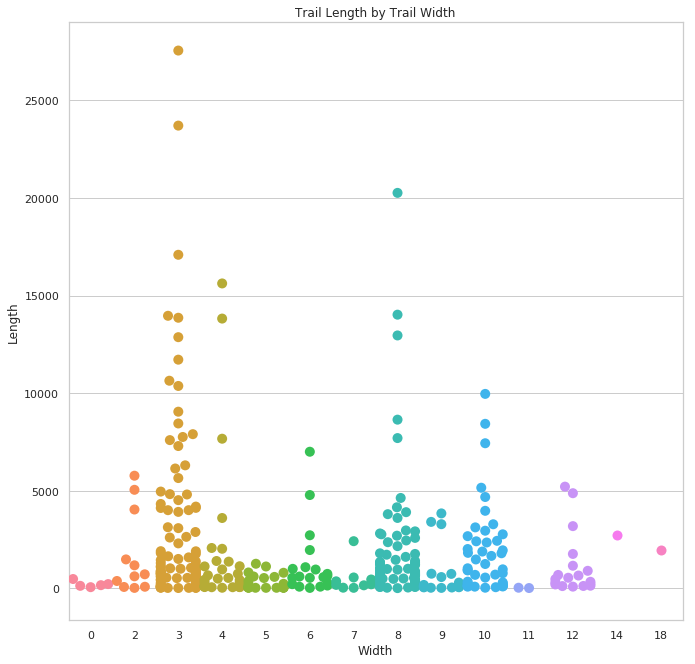

In [0]:
# df['SLog'] = np.log(df['SLength'])
x = df['WIDTH'].dropna().astype('int')
y = df['SLength']
plt.figure(figsize=(11, 11))
s = sns.swarmplot(x=x, y=y, data=df, s=10);

s.set_title('Trail Length by Trail Width')
s.set_ylabel('Length')
s.set_xlabel('Width')



# The longest trails have a smaller width with outliers
plt.show();

In [0]:
df['DOG_CODE'] = df['DOG'].map({'Yes': 1, 'No': 0})

In [0]:
len(df[(df['DOG'] == 'Yes') & (df['Terrain'] == 'Natural')])

88

In [0]:
size = len(df[df['Terrain']=='Natural'])
size_yes = len(df[(df['DOG'] == 'Yes') & (df['Terrain'] == 'Natural')])
size_no = size - size_yes

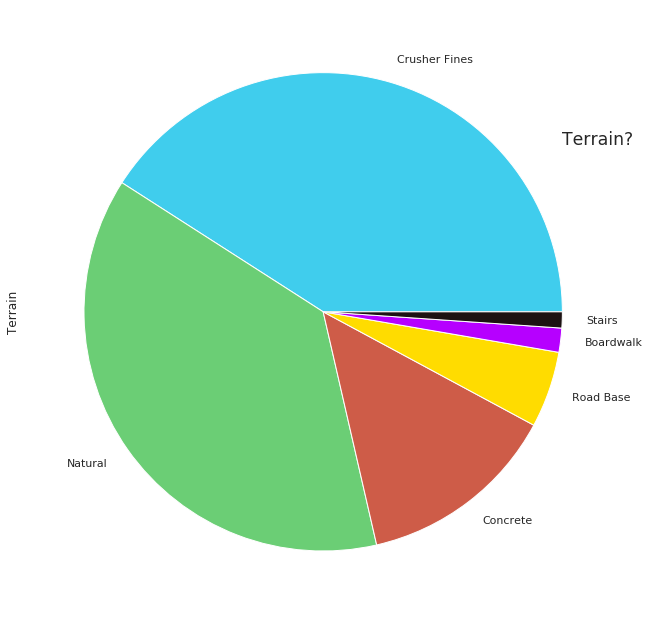

In [0]:
plt.figure(figsize=(11, 11))
df.Terrain.value_counts().plot(kind='pie')
plt.text(1, 0.7, 'Terrain?', size='x-large', fontfamily='fantasy')
plt.show();


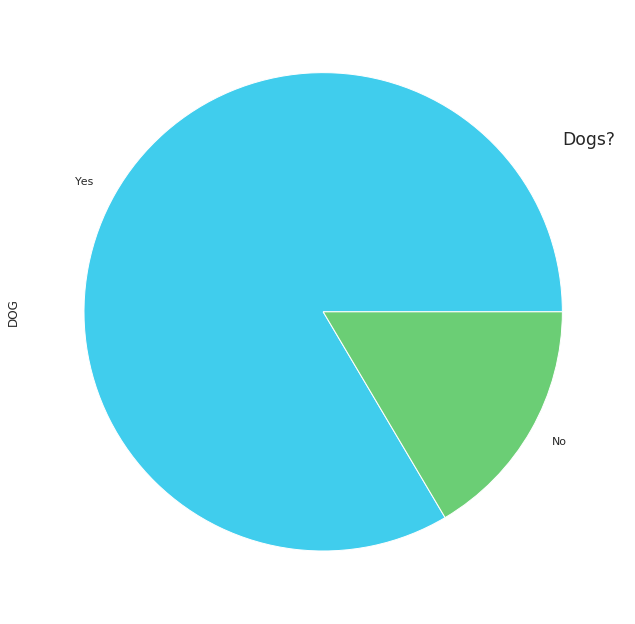

In [0]:
plt.figure(figsize=(11, 11))
df.DOG.value_counts().plot(kind='pie')
plt.text(1, 0.7, 'Dogs?', size='x-large', fontfamily='fantasy')
plt.show();


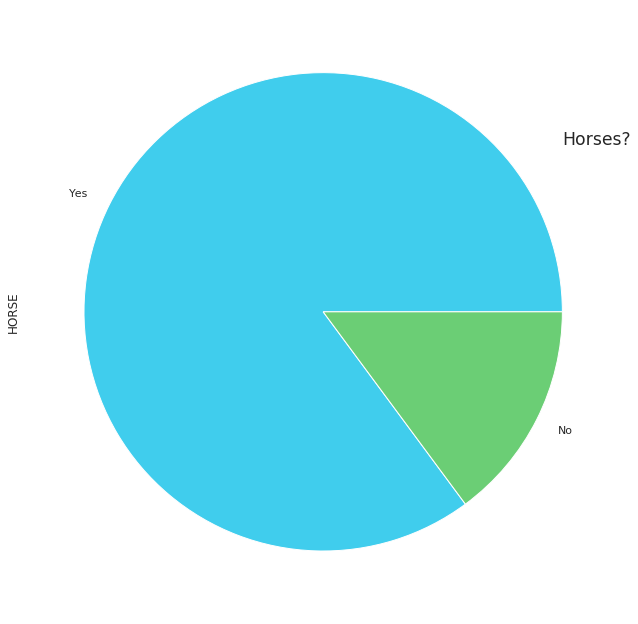

In [0]:
plt.figure(figsize=(11, 11))
df.HORSE.value_counts().plot(kind='pie')
plt.text(1, 0.7, 'Horses?', size='x-large', fontfamily='fantasy')
plt.show();


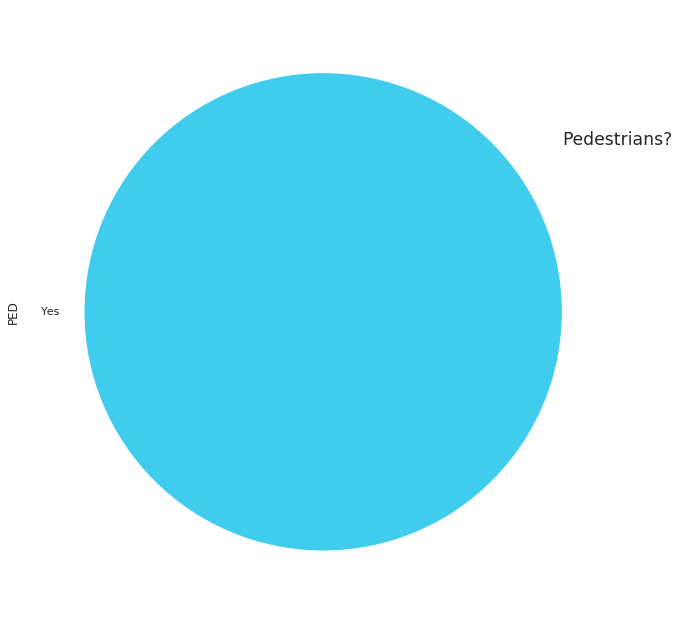

In [0]:
plt.figure(figsize=(11, 11))
df.PED.value_counts().plot(kind='pie')
plt.text(1, 0.7, 'Pedestrians?', size='x-large', fontfamily='fantasy')
plt.show();


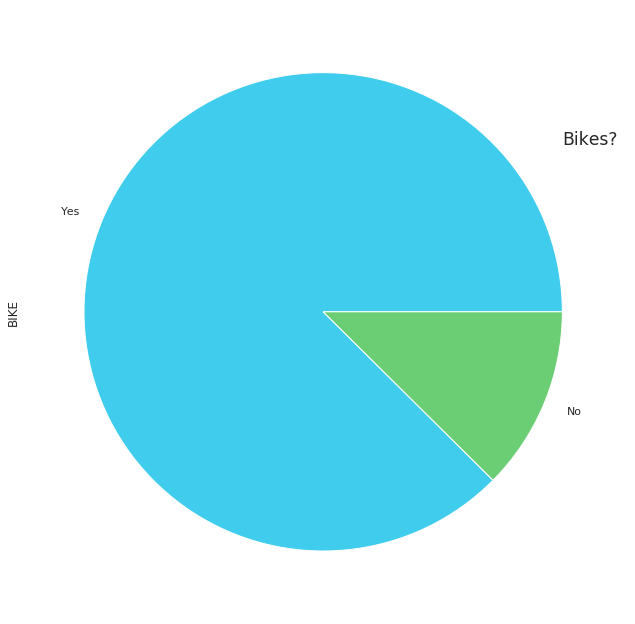

In [0]:
plt.figure(figsize=(11, 11))
df.BIKE.value_counts().plot(kind='pie')
plt.text(1, 0.7, 'Bikes?', size='x-large', fontfamily='fantasy')
plt.show();

In [0]:
df_pie = 
plot = df.plot.pie(y='mass', figsize=(5, 5))

In [0]:
df.columns

Index(['OBJECTID', 'FEATURE_TYPE', 'LOCATION', 'FEATURE_NAME', 'SURFACE_TYPE',
       'WIDTH', 'SOURCE', 'SRC_YEAR', 'STATUS', 'OWNER', 'MAINTENANCE',
       'ENFORCEMENT', 'PED', 'BIKE', 'HORSE', 'DOG', 'REMARKS', 'TrailSystem',
       'VerticalGain', 'Z_Min', 'Z_Max', 'Z_Mean', 'SLength', 'Min_Slope',
       'Max_Slope', 'Avg_Slope', 'Shapelen', 'Terrain', 'Width',
       'Terrain_Code', 'Minimum Altitude', 'Maximum Altitude',
       'Average Altitude', 'Length2', 'Length', 'Altitude Climb', 'Mean Slope',
       'Minimum Slope', 'Maximum Slope'],
      dtype='object')